# Final Project - Data Processing And Exploration

**Course**: ANLY590

**Group Members**: Yuan Liu, Guiming Xu, Kuiyu Zhu, Yuxuan Yao

**NetID**: yl1130,gx26, kz175, yy560

**Dataset**: https://www.kaggle.com/cse0031/speech-representation-and-data-exploration

This notebook is for the data cleaning, processing and exploration.

In [ ]:
from scipy.io import wavfile
import plotly.express as px
import wave
from os.path import isdir, join
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
from scipy import signal
import glob
import seaborn as sns
import random
import librosa.display
from pydub import AudioSegment

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tensorflow-speech-recognition-challenge/link_to_gcp_credits_form.txt
/kaggle/input/tensorflow-speech-recognition-challenge/test.7z
/kaggle/input/tensorflow-speech-recognition-challenge/sample_submission.7z
/kaggle/input/tensorflow-speech-recognition-challenge/train.7z


In [12]:
print(os.listdir("/kaggle/input/tensorflow-speech-recognition-challenge"))

['link_to_gcp_credits_form.txt', 'test.7z', 'sample_submission.7z', 'train.7z']


# Load DataSet

In [13]:
!apt-get install -y p7zip-full !7z x ../input/tensorflow-speech-recognition-challenge/train.7z 

/opt/conda/lib/python3.7/site-packages/IPython/core/inputtransformer2.py:481: UserWarning: `make_tokens_by_line` received a list of lines which do not have lineending markers ('\n', '\r', '\r\n', '\x0b', '\x0c'), behavior will be unspecified
  warnings.warn("`make_tokens_by_line` received a list of lines which do not have lineending markers ('\\n', '\\r', '\\r\\n', '\\x0b', '\\x0c'), behavior will be unspecified")


Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 97 not upgraded.

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan ../input/tensorflow-speech-recognition-challenge                                                          1 file, 1121103842 bytes (1070 MiB)

Extracting archive: ../input/tensorflow-speech-recognition-challenge/train.7z
--
Path = ../input/tensorflow-speech-recognition-challenge/train.7z
Type = 7z
Physical Size = 1121103842
Headers Size = 389133
Method = Delta LZMA2:24
Solid = +
Blocks = 2

    
Would you like to replace the existing file:
  Path:     ./train/LICENSE
  Size:     18651 bytes (19 KiB)
  Modified: 2017-11-13 21:13:13
with the 

In [14]:
# Get the list of labels

import os, os.path
labels = os.listdir('train/audio')
print(os.listdir("train/audio"))
print(len(labels))

['five', 'wow', 'no', 'one', 'nine', 'bird', 'stop', 'six', '_background_noise_', 'go', 'happy', 'left', 'down', 'zero', 'seven', 'right', 'on', 'marvin', 'house', 'four', 'yes', 'cat', 'two', 'bed', 'three', 'dog', 'eight', 'off', 'up', 'sheila', 'tree']
31


In [15]:
paths_train_data = []
for files in labels:
    content = os.path.join('train/audio', files, '*')
    paths_train_data.append(content)

In [16]:
# define a function
# to get wav file in selected label

def data(label):
    for paths in paths_train_data:
        if paths.split('/')[2] == label:
             label_data = glob.glob(paths)
    return label_data
data('yes')[:2]

['train/audio/yes/10ace7eb_nohash_0.wav',
 'train/audio/yes/b00dff7e_nohash_0.wav']

# Data Visualization:
## Amplitude/ BarPlot/ Spectogram/ MFCC

In [17]:
#when we read a 'wav' file using a wavfile reader we get two outputs
#the first output give us the total sample rates in our audio file
#the second output consists of the amplitude of the audio file
#here we have selected the first wav file from the class 'yes'
sample_rates1, samples1 = wavfile.read(data('yes')[0])
sample_rates2, samples2 = wavfile.read(data('yes')[4])
sample_rates3, samples3 = wavfile.read(data('yes')[10])

print(samples1.shape)
print(samples2.shape)
print(samples3.shape)

(16000,)
(11146,)
(16000,)


### Amplitude Frequency Plot(Time-dimain of given signal)

let's plot the graph depicting the amplitutde range of our audio file

we randomly choose three wav files from 'yes' label( index = 0, 4, 7)

to begin with,
we can find the min, max, mean of amplitude are different among these three files.

when amplitude is equal to 0, it means silence, and therefore, for each of these plots, there are silence for kind of long time, and the voice of 'Yes' also appears at different times, either in the first half, middle, or last half of the sentence.

The Descriptive Information for random selection of train/audio/yes/10ace7eb_nohash_0.wav


min:  -14347 
max:  16439 
mean:  -1.819375 
median:  0.0 
variance:  3779430.2967496095 
length:  16000


The Descriptive Information for random selection of train/audio/yes/0685264e_nohash_1.wav


min:  -25283 
max:  32462 
mean:  -1.6323125 
median:  -1.0 
variance:  14313387.199868403 
length:  16000


The Descriptive Information for random selection of train/audio/yes/05b2db80_nohash_0.wav


min:  -3661 
max:  394 
mean:  -1726.960125 
median:  -1676.0 
variance:  457705.1221599844 
length:  16000




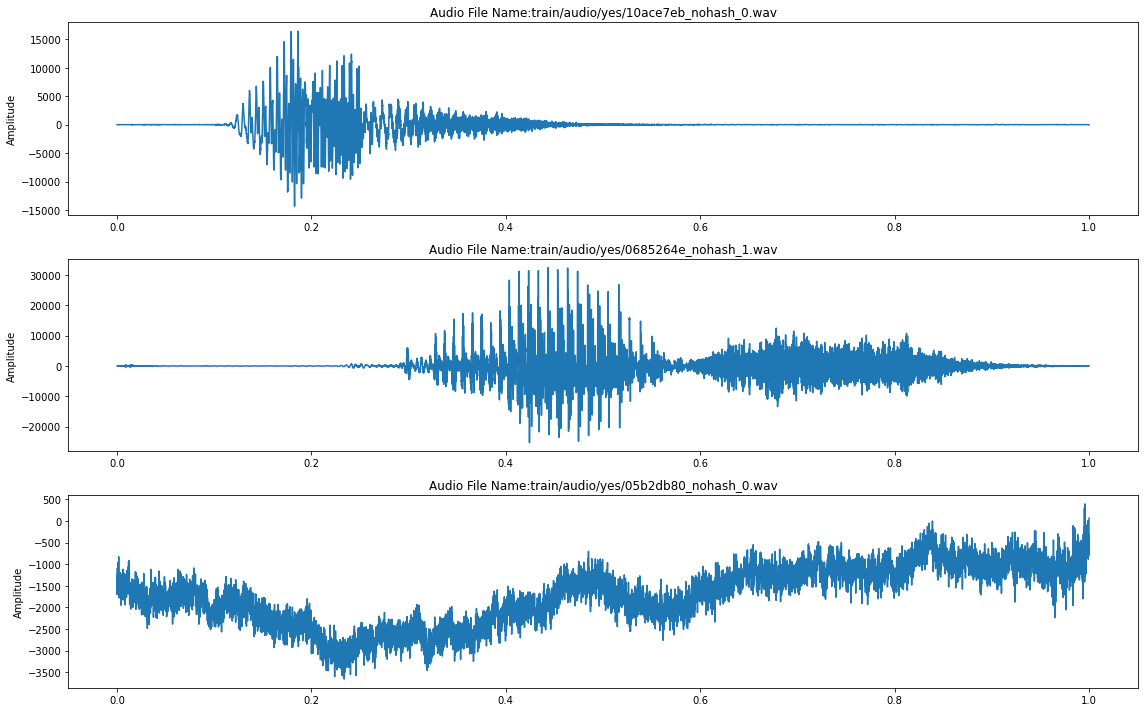

In [23]:
f, ax = plt.subplots(3, 1, figsize = (16,10))
def amplitude(plot_location,data):
    sample_rates, samples = wavfile.read(data)
    ax[plot_location].plot(np.linspace(0, 1, sample_rates), samples)
    ax[plot_location].set_title('Audio File Name:' + data)
    ax[plot_location].set_ylabel('Amplitude')
    print('The Descriptive Information for random selection of ' + data)
    print('\n')
    print('min: ',np.min(samples), 
      '\nmax: ', np.max(samples), 
      '\nmean: ', np.mean(samples),
      '\nmedian: ', np.median(samples),
      '\nvariance: ', np.var(samples),
      '\nlength: ', len(samples))
    print('\n')

amplitude(0,data('yes')[0])
amplitude(1,data('yes')[10])
amplitude(2,data('yes')[15])

f.tight_layout()

plt.show()

Then,
we can listen to these selected files and compared with amplititude plot.

In [25]:
samples1=np.array(samples1, dtype='float64')

samples1 = librosa.resample(samples1, sample_rates1, 5000)
ipd.Audio(samples1, rate=5000)


Immediately 'Yes' sounds out.

In [26]:
samples2=np.array(samples2, dtype='float64')

samples2 = librosa.resample(samples2, sample_rates2, 5000)
ipd.Audio(samples2, rate=5000)

After around 0.5s, 'Yes' sounds out

In [27]:
samples3=np.array(samples3, dtype='float64')

samples3 = librosa.resample(samples3, sample_rates3, 5000)
ipd.Audio(samples3, rate=5000)

the third one has minimal silence time

## Bar Plot to show the count of different labels

In [28]:
train_audio_path = 'train/audio'

labels=os.listdir(train_audio_path)

#find count of each label and plot bar graph
counts=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    counts.append(len(waves))

audio_count_dict = dict(zip(labels,counts))

audio_count_df = pd.DataFrame(audio_count_dict.items(),columns=['type','count'])

We can find the numbers of count of different labels can be separated into two parts. 
1. around 2400
2. around 1600

In [29]:
color=np.array(['rgb(255,255,255)']*audio_count_df.shape[0])
color[audio_count_df['count']<1500]='rgb(204,204, 205)'
color[audio_count_df['count']>=1500]='rgb(130, 0, 0)'
fig = px.bar(audio_count_df, x='type', y='count', color='count',
             color_continuous_scale=px.colors.diverging.Tealrose, 
             color_continuous_midpoint=1000,height=400)
fig.show()

## Bar Plot to show the distribution of duration in the dataset

In [30]:
duration=[]
wav_files = []
label_duration_dict = {}
for label_ in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label_) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label_ + '/' + wav)
        duration.append(float(len(samples)/sample_rate))
        wav_files.append(wav)
    label_duration_dict[label_] = dict(zip(wav_files,duration))
    wav_files = []
    duration = []
    
duration_dict = dict(zip(wav_files,duration))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning:

Chunk (non-data) not understood, skipping it.



In [31]:
duration_dict = dict(zip(wav_files,duration))
long_duration = []
for i in label_duration_dict.keys():
    for j in label_duration_dict[i].items():
        if j[1] > 1.0:
            long_duration.append(j)
            long_duration.append(i)
long_duration

[('running_tap.wav', 61.1555),
 '_background_noise_',
 ('doing_the_dishes.wav', 95.183125),
 '_background_noise_',
 ('white_noise.wav', 60.0),
 '_background_noise_',
 ('pink_noise.wav', 60.0),
 '_background_noise_',
 ('dude_miaowing.wav', 61.8056875),
 '_background_noise_',
 ('exercise_bike.wav', 61.253875),
 '_background_noise_']

In [32]:
# we can find these too long audio file are all from background_noise
# we should delete them

remove_list = ['white_noise.wav','doing_the_dishes.wav','pink_noise.wav',
               'exercise_bike.wav','running_tap.wav','dude_miaowing.wav']
for key in remove_list:
    if key in label_duration_dict['_background_noise_']:
        del label_duration_dict['_background_noise_'][key]

In [33]:
# the duration of different label

ids = []
frames = []

for id_, d in label_duration_dict.items():
    ids.append(id_)
    frames.append(pd.DataFrame.from_dict(d, orient='index'))

duration_df = pd.concat(frames, keys=ids).reset_index()
duration_df.columns = ['label','filename','duration']

duration_df['duration'] = duration_df['duration'].astype(float)

Most of duration is 1.0s

Text(0.5, 1.0, 'Count Plot of different duration of audio')

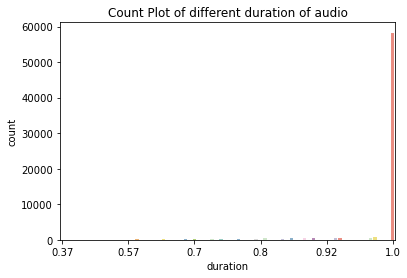

In [34]:
from matplotlib.ticker import FormatStrFormatter
fig,ax = plt.subplots()
g = sns.countplot(duration_df['duration'],palette='Set3')
new_ticks = [i.get_text() for i in g.get_xticklabels()]
new_ticks = [round(float(num),2) for num in new_ticks]
plt.xticks(np.round(range(0, len(new_ticks), 15),2),new_ticks[::15])
plt.title('Count Plot of different duration of audio')

## The Distribution of duration under different labels

In [35]:
# because we have around 30 labels
# we randomly select 10 labels to do visualizations

random_select_labels = random.sample(labels,10)
random_duration_df = duration_df[duration_df['label'].isin(random_select_labels)]

In [36]:
bins = [0,0.2,0.4,0.6,0.8,1.0,1.2]
random_duration_df['duration_bins'] = pd.cut(random_duration_df['duration'],bins)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Under different labels,
the conclusion is same that most length of duration is 1.0s.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



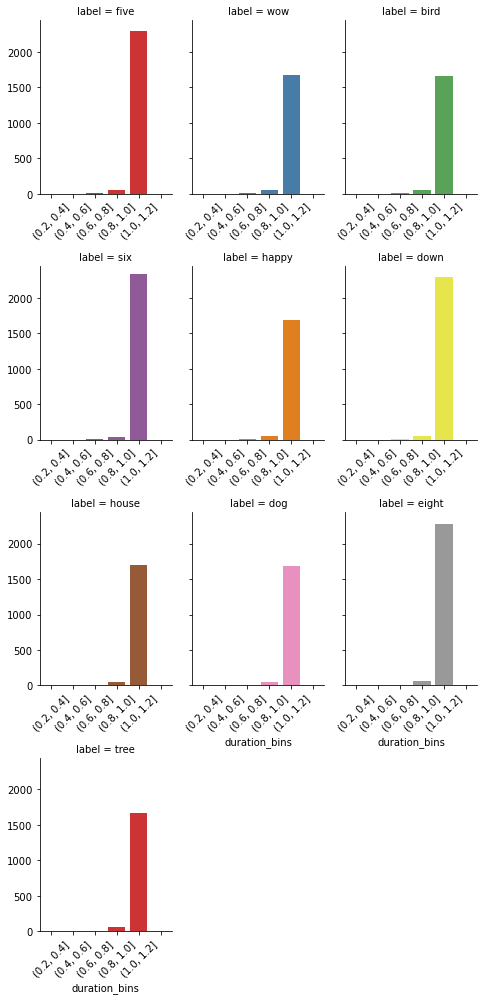

In [37]:
order = sorted(random_duration_df['duration_bins'].unique())
order.append(pd.Interval(1.0,1.2,closed='right'))
g = sns.FacetGrid(random_duration_df, col="label", hue='label',palette='Set1',height=3.5, aspect=.65,col_wrap=3,
                  sharex=False)
g.map(sns.countplot, "duration_bins")
g.set_xticklabels(order, rotation=45)
g.fig.tight_layout()

## Spectograms & Normalized Spectograms & MFCC

Spectogram(wiki):
A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time

Normalized Spectograms:
After we normalized the features

Mel-Scale:
scales the frequency in order to match more closely what the human ear can hear

cepstrum:
cepstrum is the information of rate of change in spectral bands

Mel Spectogram:
a Spectrogram with the Mel Scale as its y axis.

The reason why we use Spectograms and Mel Spectograms is to identify sound better by trainsitions

At this time,
we choose one sample from 'marvin' label, and one sample from 'bird' sample to visualize.

In [44]:
marvin_rate, marvin = wavfile.read(data('marvin')[2])
marvin=np.array(marvin, dtype='float64')

marvin = librosa.resample(marvin, marvin_rate, 5000)
ipd.Audio(marvin, rate=5000)

In [39]:
bird_rate, bird = wavfile.read(data('bird')[5])
bird=np.array(bird, dtype='float64')

bird = librosa.resample(bird, bird_rate, 5000)
ipd.Audio(bird, rate=5000)

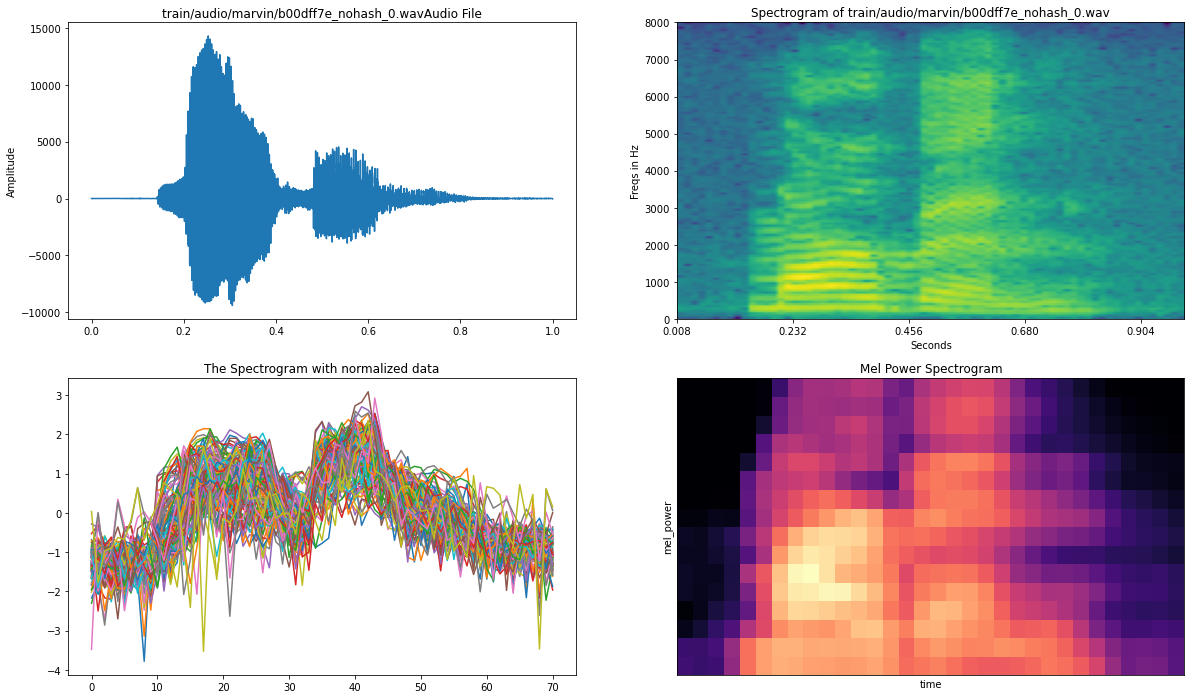

In [45]:
class Spectograms_Hist:
    def __init__(self,path,filename):
        self.path = path
        self.filename = filename
        self.full_path = str(path) + filename
        self.sample_rate,self.samples = wavfile.read(self.full_path)
        fig,ax = plt.subplots(2,2,figsize=(20,12))
        self.fig = fig
        self.ax = ax 
    
    def plot_histogram(self):
        sample_rates, samples = wavfile.read(self.full_path)
        self.ax[0][0].plot(np.linspace(0, 1, sample_rates), samples)
        self.ax[0][0].set_title(self.full_path + 'Audio File')
        self.ax[0][0].set_ylabel('Amplitude')
    
    def pre_spectograms(self):
        self.freqs, self.times, spec = signal.spectrogram(self.samples,
                                    fs=self.sample_rate,
                                    window='hann',
                                    detrend=False)
        self.spec = np.log(spec.T.astype(np.float32))
        return self.spec
    
    def plot_spectograms(self):
        self.ax[0][1].imshow(self.spec.T, aspect='auto', origin='lower', 
                   extent=[self.times.min(), self.times.max(), self.freqs.min(), self.freqs.max()])
        self.ax[0][1].set_yticks(self.freqs[::16])
        self.ax[0][1].set_xticks(self.times[::16])
        self.ax[0][1].set_title('Spectrogram of ' + self.full_path)
        self.ax[0][1].set_ylabel('Freqs in Hz')
        self.ax[0][1].set_xlabel('Seconds')
        
    def plot_normalized_spectrogram(self):
        spec = self.pre_spectograms()
        mean = np.mean(spec, axis=0)
        std = np.std(spec, axis=0)
        spectrogram = (spec - mean) / std
        self.ax[1][0].plot(spectrogram)
        self.ax[1][0].set_title('The Spectrogram with normalized data')
        
    def plot_mel_spectrogram(self,n_components=16,window_size=15):
        melspectrogram = librosa.feature.melspectrogram(
        y=self.samples.astype(float), 
        sr=self.sample_rate, 
        n_mels=n_components
        )
        self.melspectrogram = melspectrogram
        librosa.display.specshow(librosa.power_to_db(melspectrogram),sr=self.sample_rate,ax=self.ax[1][1])
        plt.xlabel('time')
        plt.ylabel('mel_power')
        plt.title('Mel Power Spectrogram')
        
        
        
        

spec = Spectograms_Hist('train/audio/marvin/','b00dff7e_nohash_0.wav')
spec.plot_histogram()
spec.pre_spectograms()
spec.plot_spectograms()
spec.plot_normalized_spectrogram()
spec.plot_mel_spectrogram()

For the first plot(amplitude), we can find the peak is around 0.2s, and next peak is around 0.5s.

Comparing with Spectogram and Mel Power Sprctogram, we can find the bright region means the peaks. and for Spectogram is from 0.232s to 0.4s, and next peak is from 0.456 to 0.680.

This result is same as the result from amplitude plot.

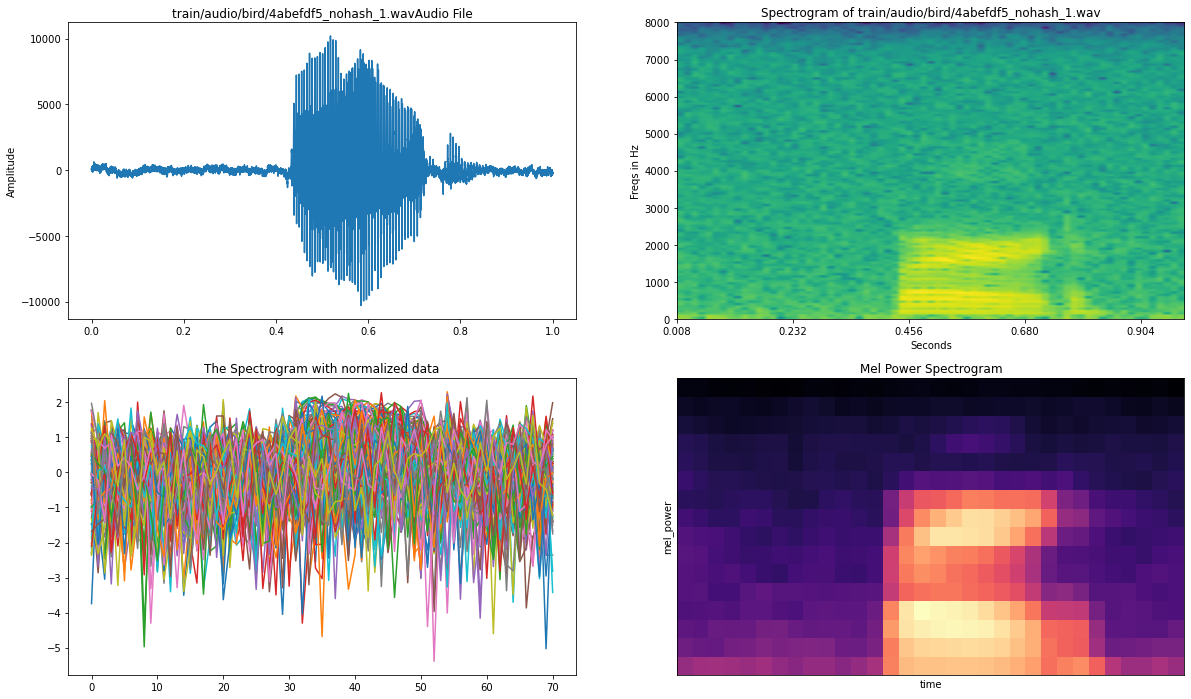

In [46]:
spec = Spectograms_Hist('train/audio/bird/','4abefdf5_nohash_1.wav')
spec.plot_histogram()
spec.pre_spectograms()
spec.plot_spectograms()
spec.plot_normalized_spectrogram()
spec.plot_mel_spectrogram()

It is kind of similar with the example showed above, the reuslt of spectogram is close to the result of wave plot, but the result of spectogram is much more precise.

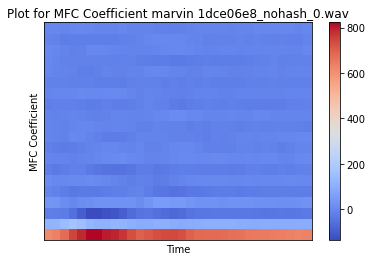

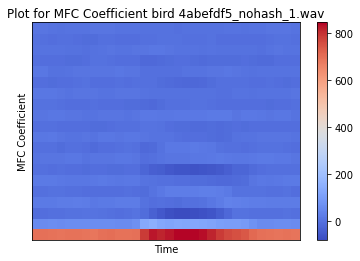

In [47]:
def plot_mfcc(type_,filename):
    sample_rates, samples = wavfile.read('train/audio/'+type_+'/'+filename)
    mfcc = librosa.feature.mfcc(y=(samples).astype(float),sr=sample_rates)
    librosa.display.specshow(mfcc)
    plt.title('Plot for MFC Coefficient ' + type_ + ' ' + filename)
    plt.xlabel('Time')
    plt.ylabel('MFC Coefficient')
    plt.colorbar()
    
plot_mfcc('marvin','1dce06e8_nohash_0.wav')
plt.show()
plot_mfcc('bird','4abefdf5_nohash_1.wav')

# Data Preprocess

In [48]:
# try to delete some silence in the audio

def detect_leading_silence(sound, silence_threshold=-50.0, chunk_size=10):
    trim_ms = 0 # ms

    assert chunk_size > 0 # to avoid infinite loop
    while sound[trim_ms:trim_ms+chunk_size].dBFS < silence_threshold and trim_ms < len(sound):
        trim_ms += chunk_size

    return trim_ms

sound = AudioSegment.from_file("train/audio/bed/28612180_nohash_0.wav", format="wav")

start_trim = detect_leading_silence(sound)
end_trim = detect_leading_silence(sound.reverse())

duration = len(sound)    
trimmed_sound = sound[start_trim:duration-end_trim]

In [49]:
trimmed_sound

In [50]:
sound

Text(2500, 0, 'D')

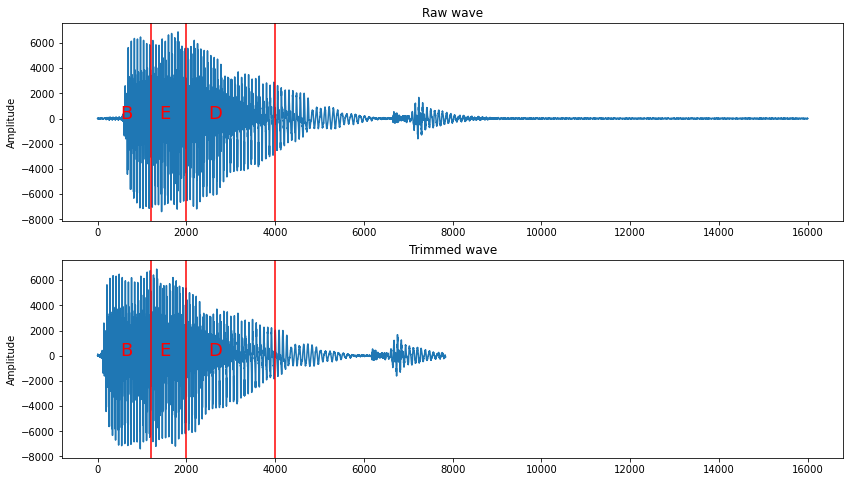

In [53]:
raw_sample = np.array(sound.get_array_of_samples())
trimmed_sample = np.array(trimmed_sound.get_array_of_samples())

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave')
ax1.set_ylabel('Amplitude')
ax1.plot(raw_sample)
ax1.axvline(x=1200, c='r')
ax1.axvline(x=2000,c='r')
ax1.axvline(x=4000,c='r')
ax1.text(500, 0, 'B', fontsize=18,c='r')
ax1.text(1400, 0, 'E', fontsize=18,c='r')
ax1.text(2500, 0, 'D', fontsize=18,c='r')

ax2 = fig.add_subplot(212,sharex=ax1)
ax2.set_title('Trimmed wave')
ax2.set_ylabel('Amplitude')
ax2.plot(trimmed_sample)
ax2.axvline(x=1200, c='r')
ax2.axvline(x=2000,c='r')
ax2.axvline(x=4000,c='r')
ax2.text(500, 0, 'B', fontsize=18,c='r')
ax2.text(1400, 0, 'E', fontsize=18,c='r')
ax2.text(2500, 0, 'D', fontsize=18,c='r')

After we trim the audio file, the length of plot decreases on the graph, and the reason of this process is to decrease the size of file, and this can save time when we run the deep learning model.
Moreover, the quality and information of audio is not changed.

However,
This method will lead the audio file has different duration, so we need to make sure each audio file in the same duration. In this dataset, most audio duration is 1.0s, so we will pad the duration to 1.0s if duration is less than 1.0s  or trim the duration to 1.0s if duration is larger than 1.0s.

## 1. Remove Outliers

In [54]:
# Find the outliers
duration=[]
wav_files = []
label_duration_dict = {}
for label_ in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label_) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label_ + '/' + wav)
        duration.append(float(len(samples)/sample_rate))
        wav_files.append(wav)
    label_duration_dict[label_] = dict(zip(wav_files,duration))
    wav_files = []
    duration = []
    
duration_dict = dict(zip(wav_files,duration))
long_duration = []
for i in label_duration_dict.keys():
    for j in label_duration_dict[i].items():
        if j[1] > 1.0:
            long_duration.append(j)
            long_duration.append(i)
long_duration

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: WavFileWarning:

Chunk (non-data) not understood, skipping it.



[('running_tap.wav', 61.1555),
 '_background_noise_',
 ('doing_the_dishes.wav', 95.183125),
 '_background_noise_',
 ('white_noise.wav', 60.0),
 '_background_noise_',
 ('pink_noise.wav', 60.0),
 '_background_noise_',
 ('dude_miaowing.wav', 61.8056875),
 '_background_noise_',
 ('exercise_bike.wav', 61.253875),
 '_background_noise_']

In [57]:
# Train Set and Test Set

train_path = 'train/audio/'

def pad_audio(samples):
    return np.pad(samples, pad_width=(16000 - len(samples), 0), mode='constant', constant_values=(0, 0))

def chop_audio(samples, L=16000, num=20):
    for i in range(num):
        beg = np.random.randint(0, len(samples) - L)
        yield samples[beg: beg + L]

X_train = []
y_train = []
for label in labels:
    print('Loading for ' + label + '...' )
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        if len(samples) < 16000:
            samples = pad_audio(samples)
        elif len(samples) > 16000:
            n_samples = chop_audio(samples)
        else: 
            samples = samples
        samples = librosa.resample(samples, sample_rate, int(16000 / sample_rate * samples.shape[0]))
        if labels not in ['_background_noise'] and samples not in ['white_noise.wav','doing_the_dishes.wav','pink_noise.wav',
                                                                    'exercise_bike.wav','running_tap.wav','dude_miaowing.wav']:
            X_train.append(samples)
            y_train.append(label)
    print('Loading for ' + label + ' Done!')

Loading for five...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Loading for five Done!
Loading for wow...
Loading for wow Done!
Loading for no...
Loading for no Done!
Loading for one...
Loading for one Done!
Loading for nine...
Loading for nine Done!
Loading for bird...
Loading for bird Done!
Loading for stop...
Loading for stop Done!
Loading for six...
Loading for six Done!
Loading for _background_noise_...
Loading for _background_noise_ Done!
Loading for go...
Loading for go Done!
Loading for happy...
Loading for happy Done!
Loading for left...
Loading for left Done!
Loading for down...
Loading for down Done!
Loading for zero...
Loading for zero Done!
Loading for seven...
Loading for seven Done!
Loading for right...
Loading for right Done!
Loading for on...
Loading for on Done!
Loading for marvin...
Loading for marvin Done!
Loading for house...
Loading for house Done!
Loading for four...
Loading for four Done!
Loading for yes...
Loading for yes Done!
Loading for cat...
Loading for cat Done!
Loading for two...
Loading for two Done!
Loading for bed

In [58]:
X_train

[array([ 0.00061035,  0.00061035,  0.00073242, ..., -0.00115967,
        -0.00097656, -0.0007019 ], dtype=float32),
 array([1.2207031e-04, 1.5258789e-04, 6.1035156e-05, ..., 6.1035156e-05,
        9.1552734e-05, 2.1362305e-04], dtype=float32),
 array([-0.0015564 , -0.00305176, -0.0038147 , ...,  0.00061035,
         0.00085449,  0.00079346], dtype=float32),
 array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00, -3.0517578e-05,  0.0000000e+00], dtype=float32),
 array([-3.0517578e-05,  9.1552734e-05, -5.1879883e-04, ...,
        -2.4414062e-04, -1.8310547e-04, -3.0517578e-04], dtype=float32),
 array([-2.1362305e-04,  3.3569336e-04, -6.7138672e-04, ...,
        -6.1035156e-05, -1.8310547e-04,  5.4931641e-04], dtype=float32),
 array([-0.00271606, -0.00228882, -0.00112915, ...,  0.11883545,
         0.11099243,  0.08740234], dtype=float32),
 array([ 0.        ,  0.        ,  0.        , ..., -0.00338745,
        -0.00177002, -0.00048828], dtype=float32),
 array

In [59]:
y_train

['five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 'five',
 